# Importing data and packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from scipy.stats import uniform, randint
from dateutil.relativedelta import relativedelta
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [4]:
df = pd.read_csv("C:\\Users\\marci\\OneDrive\\Pulpit\\Grupa2\\PrzefiltrowanaRamka.xls")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13732 entries, 0 to 13731
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   market               13732 non-null  int64  
 1   created_at           13732 non-null  object 
 2   title                12805 non-null  object 
 3   description          13732 non-null  object 
 4   price                13732 non-null  float64
 5   m                    13732 non-null  float64
 6   price_per_m          13732 non-null  float64
 7   rooms_num            13732 non-null  int64  
 8   building_type        10999 non-null  float64
 9   floor_no             12764 non-null  float64
 10  building_floors_num  11644 non-null  float64
 11  building_material    5943 non-null   float64
 12  windows_type         9037 non-null   float64
 13  heating              9853 non-null   float64
 14  build_year           8577 non-null   float64
 15  construction_status  8649 non-null  

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['free_from'] = pd.to_datetime(df['free_from'])

In [7]:
df = df.drop(columns=['description','title','price'])

In [8]:
print_full(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13732 entries, 0 to 13731
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   market               13732 non-null  int64         
 1   created_at           13732 non-null  datetime64[ns]
 2   m                    13732 non-null  float64       
 3   price_per_m          13732 non-null  float64       
 4   rooms_num            13732 non-null  int64         
 5   building_type        10999 non-null  float64       
 6   floor_no             12764 non-null  float64       
 7   building_floors_num  11644 non-null  float64       
 8   building_material    5943 non-null   float64       
 9   windows_type         9037 non-null   float64       
 10  heating              9853 non-null   float64       
 11  build_year           8577 non-null   float64       
 12  construction_status  8649 non-null   float64       
 13  rent                 3843 non-n

In [9]:
cutoff = df['created_at'].max() - relativedelta(months=6)

In [10]:
df_train, df_test = df.loc[df['created_at'] < cutoff].copy(), df.loc[df['created_at'] >= cutoff].copy()

In [11]:
df_train['created_at'] = df_train['created_at'].astype("int64")
df_train['free_from'] = df_train['free_from'].astype("int64")
df_test['created_at'] = df_test['created_at'].astype("int64")
df_test['free_from'] = df_test['free_from'].astype("int64")

In [12]:
print_full(df_train.info())
print_full(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10048 entries, 0 to 10817
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   market               10048 non-null  int64  
 1   created_at           10048 non-null  int64  
 2   m                    10048 non-null  float64
 3   price_per_m          10048 non-null  float64
 4   rooms_num            10048 non-null  int64  
 5   building_type        8050 non-null   float64
 6   floor_no             9195 non-null   float64
 7   building_floors_num  8537 non-null   float64
 8   building_material    4522 non-null   float64
 9   windows_type         6894 non-null   float64
 10  heating              7668 non-null   float64
 11  build_year           6348 non-null   float64
 12  construction_status  6281 non-null   float64
 13  rent                 3080 non-null   float64
 14  building_ownership   7064 non-null   float64
 15  free_from            10048 non-null  int6

In [13]:
train_features, test_features = df_train.drop(columns=['price_per_m']).copy(), df_test.drop(columns=['price_per_m']).copy()
train_target, test_target = df_train[['price_per_m']].copy(), df_test[['price_per_m']].copy()

In [14]:
train2_features, test2_features = df_train[['market', 'created_at', 'm', 'rooms_num', 'district_label']].copy(), df_test[['market', 'created_at', 'm', 'rooms_num', 'district_label']].copy()
train2_target, test2_target = df_train[['price_per_m']].copy(), df_test[['price_per_m']].copy()

# Model on full data

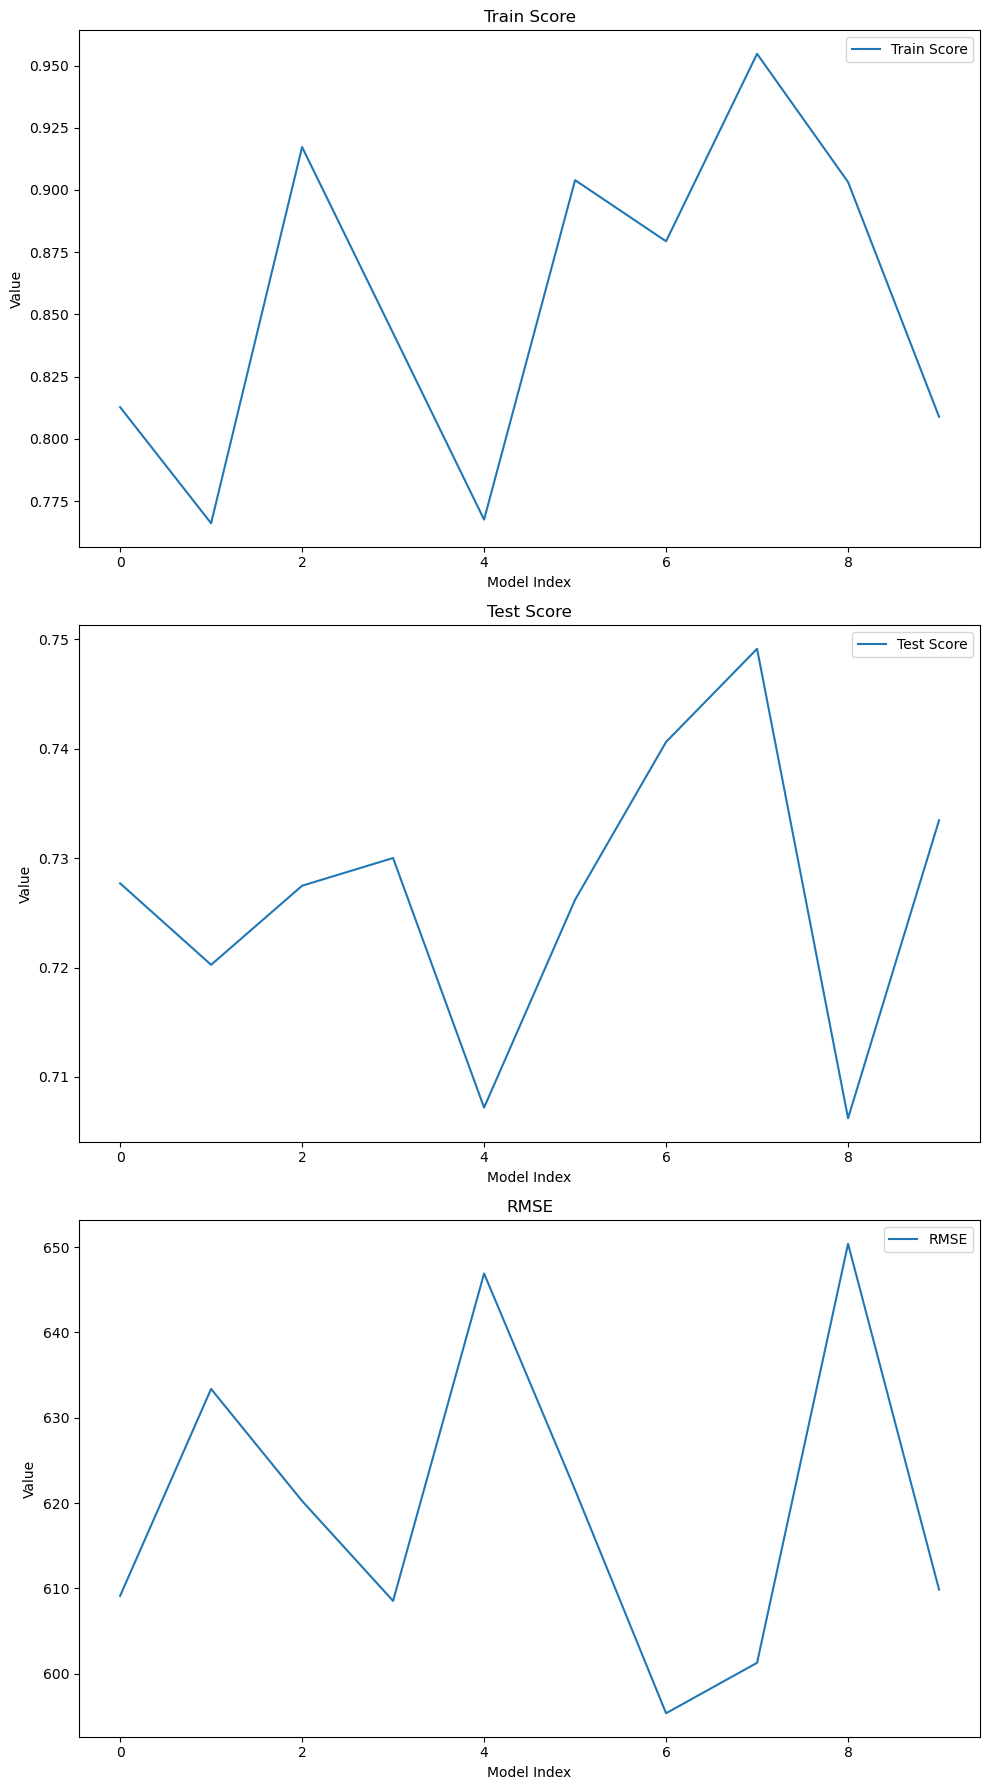

In [15]:
models_metrics = {}
grid_params_rs = [{
    "n_estimators": randint(1,500),
    "learning_rate": uniform(0,0.2),
    "max_depth": randint(1,8),
    'subsample': uniform(0,1),
    'colsample_bytree': uniform(0,0.5),
    "min_child_weight": uniform(0,200),
    'gamma': uniform(0.5,0.5)
}]

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    grid_search = RandomizedSearchCV(
        xgb.XGBRegressor(random_state=2024),
        grid_params_rs,
        scoring='neg_mean_squared_error',
        cv=5,  
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    
    model = xgb.XGBRegressor(random_state=21, **best_params)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
  
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    models_metrics[i] = {'train_score': train_score, 
                         'test_score': test_score, 
                         'RMSE': rmse}

metrics_df = pd.DataFrame(models_metrics).T

plt.figure(figsize=(10, 18))

# train_score
plt.subplot(3, 1, 1)
plt.plot(metrics_df['train_score'], label='Train Score')
plt.xlabel('Model Index')
plt.ylabel('Value')
plt.title('Train Score')
plt.legend()

# test_score
plt.subplot(3, 1, 2)
plt.plot(metrics_df['test_score'], label='Test Score')
plt.xlabel('Model Index')
plt.ylabel('Value')
plt.title('Test Score')
plt.legend()

# RMSE
plt.subplot(3, 1, 3)
plt.plot(metrics_df['RMSE'], label='RMSE')
plt.xlabel('Model Index')
plt.ylabel('Value')
plt.title('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
avg_metrics = metrics_df.mean()
avg_metrics_df = pd.DataFrame(avg_metrics, columns=['Average Metrics'])
avg_metrics_df.index.name = 'Metric'
avg_metrics_df

,Average Metrics
Metric,
train_score,0.855636
test_score,0.726823
RMSE,619.652913


## Feature selection

In [17]:
rewards = [0] * len(train_features.columns)

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3)
    
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'n_estimators': [100, 250, 500],
    }
    
    kf = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    grid_search = RandomizedSearchCV(
        xgb.XGBRegressor(random_state=2024),
        param_grid,
        cv=kf,
        n_jobs=-1,
        random_state=2024
    )
    
    grid_search.fit(X_train, y_train)
    
    feature_importances = grid_search.best_estimator_.feature_importances_
    top_15_indices = np.argsort(feature_importances)[-15:]
    
    for i, idx in enumerate(top_15_indices):
        rewards[idx] += i+1

sorted_features = sorted(range(len(rewards)), key=lambda i: rewards[i], reverse=True)[:15]


In [18]:
print("Top 15 features with rewards:")
for idx in sorted_features:
    print(f"Feature {train_features.columns[idx]} with reward {rewards[idx]}")

Top 15 features with rewards:
Feature dishwasher with reward 135
Feature m with reward 128
Feature monitoring with reward 127
Feature build_year with reward 124
Feature tv with reward 94
Feature building_floors_num with reward 82
Feature building_type with reward 81
Feature garage with reward 81
Feature heating with reward 76
Feature rooms_num with reward 64
Feature basement with reward 58
Feature air_conditioning with reward 49
Feature two_storey with reward 29
Feature created_at with reward 19
Feature building_ownership with reward 17


In [19]:
cols = train_features.columns[sorted_features]

In [20]:
train_features = train_features[cols]
test_features = test_features[cols]

## Hyperparameter tuning

In [21]:
model1 = xgb.XGBRegressor(random_state=21)

In [22]:
grid_params_rs = [{
    "n_estimators": randint(1,500),
    "learning_rate": uniform(0,0.2),
    "max_depth": randint(1,8),
    'subsample': uniform(0,1),
    'colsample_bytree': uniform(0,0.5),
    "min_child_weight": uniform(0,200),
    'gamma': uniform(0.5,0.5)
}]

In [23]:
grid = RandomizedSearchCV(model1, grid_params_rs, random_state=2024, n_iter=100)

In [24]:
grid.fit(train_features, train_target)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000274F02E3110>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000274F02F2B50>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000274F02E3610>,
                                         'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000274F02C0910>}],
                   random_state=2024)

In [25]:
grid.best_params_

{'colsample_bytree': 0.4710433924108117,
 'gamma': 0.8470987322522179,
 'learning_rate': 0.1442372714910396,
 'max_depth': 5,
 'min_child_weight': 19.900294953730867,
 'n_estimators': 490,
 'subsample': 0.8814587995546425}

### Fitting model with best params

In [26]:
best_model = xgb.XGBRegressor(random_state=21, **grid.best_params_)

In [27]:
best_model.fit(train_features, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4710433924108117, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.8470987322522179, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1442372714910396, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=19.900294953730867, missing=nan,
             monotone_constraints=None, n_estimators=490, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=21, ...)

In [28]:
best_model.score(train_features, train_target)

0.8671074373856629

In [29]:
best_model.score(test_features, test_target)

0.43703806783249666

In [30]:
predicted_target = best_model.predict(test_features)
root_mean_squared_error(test_target, predicted_target)

736.2549719945918

#### default model (for comparison)

In [31]:
default = xgb.XGBRegressor(random_state=13)
default.fit(train_features, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=13, ...)

In [32]:
default.score(test_features,test_target)

0.25404274887760947

# Model on data without the text variables

In [33]:
model2 = xgb.XGBRegressor(random_state=21)


In [34]:
grid2 = RandomizedSearchCV(model2, grid_params_rs, random_state=2024, n_iter=100)

In [35]:
grid2.fit(train2_features, train2_target)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000274F02E3110>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000274F02F2B50>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000274F02E3610>,
                                         'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000274F02C0910>}],
                   random_state=2024)

In [36]:
grid2.best_params_

{'colsample_bytree': 0.4710433924108117,
 'gamma': 0.8470987322522179,
 'learning_rate': 0.1442372714910396,
 'max_depth': 5,
 'min_child_weight': 19.900294953730867,
 'n_estimators': 490,
 'subsample': 0.8814587995546425}

In [37]:
best_model2 = xgb.XGBRegressor(random_state=21, **grid2.best_params_)

In [38]:
best_model2.fit(train2_features, train2_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4710433924108117, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.8470987322522179, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1442372714910396, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=19.900294953730867, missing=nan,
             monotone_constraints=None, n_estimators=490, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=21, ...)

In [39]:
best_model2.score(train2_features, train2_target)

0.6950268364808623

In [40]:
best_model2.score(test2_features, test2_target)

0.2248389262751901

In [41]:
predicted2_target = best_model2.predict(test2_features)
root_mean_squared_error(test_target, predicted2_target)

863.9422321080898

#### default model (for comparison)

In [42]:
default2 = xgb.XGBRegressor(random_state=13)
default2.fit(train2_features, train2_target)
default2.score(test2_features,test2_target)

-0.05942505349494254